In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Paths
train_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Origin/Train'
test_dir = '/kaggle/input/fruit-yield/FruitYield DataSet/Origin/Test'

# Parameters
img_size = (224, 224)
batch_size = 16
num_classes = 6  # Brazil, India, New Zealand, Peru, Spain, Iraq

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Build model
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for 6-class output
])

model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
checkpoint = ModelCheckpoint('origin_best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)


2025-04-16 11:10:49.071211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744801849.277565      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744801849.340258      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2393 images belonging to 6 classes.
Found 644 images belonging to 6 classes.


I0000 00:00:1744801865.229483      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744801865.230151      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,112,518 (11.87 MB)

 Trainable params: 854,534 (3.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744801878.760913     106 service.cc:148] XLA service 0x78d124010ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744801878.761602     106 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744801878.761620     106 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744801879.668673     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/150 ━━━━━━━━━━━━━━━━━━━━ 37:24 15s/step - accuracy: 0.0625 - loss: 1.8751

I0000 00:00:1744801883.608680     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.6679 - loss: 0.8687
Epoch 1: val_loss improved from inf to 0.20970, saving model to origin_best_model.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - accuracy: 0.6700 - loss: 0.8638 - val_accuracy: 0.9472 - val_loss: 0.2097 - learning_rate: 1.0000e-04
Epoch 2/50
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9464 - loss: 0.1612
Epoch 2: val_loss improved from 0.20970 to 0.12076, saving model to origin_best_model.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 275ms/step - accuracy: 0.9465 - loss: 0.1610 - val_accuracy: 0.9658 - val_loss: 0.1208 - learning_rate: 1.0000e-04
Epoch 3/50
149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9737 - loss: 0.0826
Epoch 3: val_loss improved from 0.12076 to 0.10239, saving model to origin_best_model.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 43s 276ms/step - accuracy: 0.9737 - loss: 0.0826 - val_accuracy: 0.9736 - val_loss: 0.1024 - learning_rate: 1.0000e-04
Epoch 4/50
149/150 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Origin: Brazil (Confidence: 1.00)


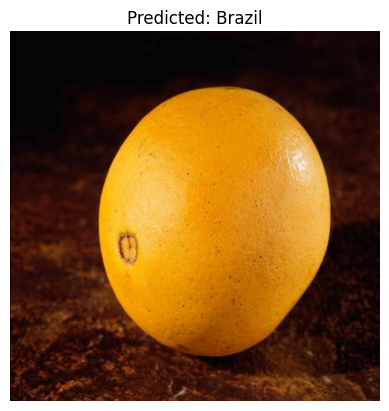

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Class labels (must match your training labels)
class_labels = ['Brazil', 'India','Iraq', 'New Zealand', 'Peru', 'Spain']

# Load the saved full model
model = load_model('origin_best_model.keras')

# Image preprocessing function
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = img_to_array(image)
    image = preprocess_input(image)  # for MobileNetV2
    image = np.expand_dims(image, axis=0)
    return image

# Predict on a new image
image_path = '/kaggle/input/fruit-yield/FruitYield DataSet/Origin/Predict/Navel_Orange (86).jpg'  # replace with actual image path
image = preprocess_image(image_path)

# Predict the origin
prediction = model.predict(image)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)

# Display results
print(f"Predicted Origin: {predicted_class} (Confidence: {confidence:.2f})")

# Show the image
img_show = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


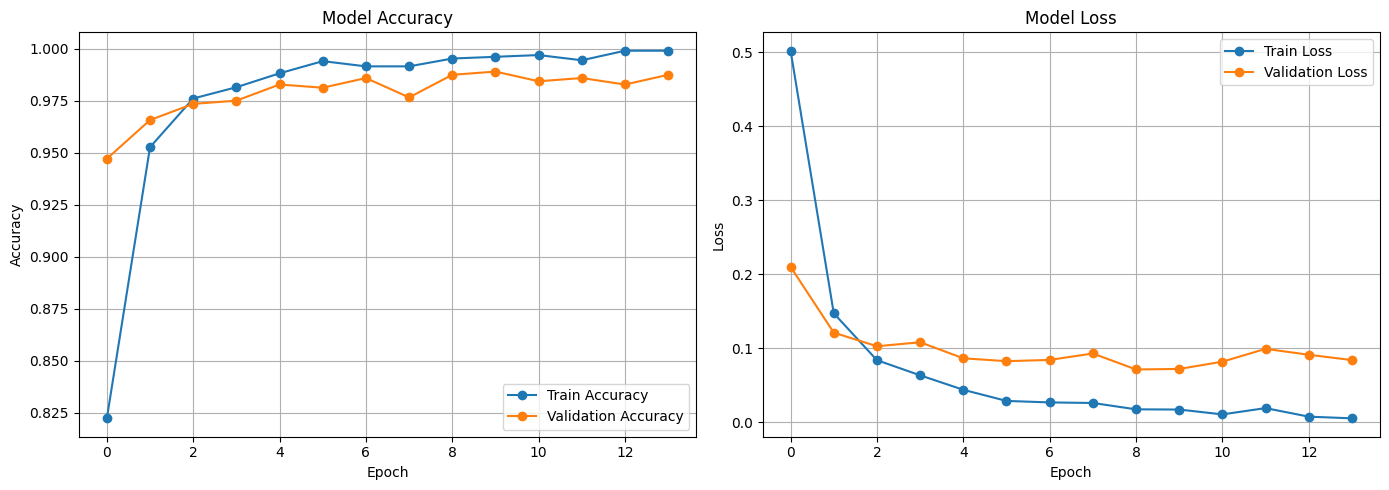

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
# Accessing the history object after training
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Printing the accuracy and loss for each epoch
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)


Training Accuracy: [0.8223986625671387, 0.9527789354324341, 0.9761805534362793, 0.981613039970398, 0.9882991909980774, 0.9941496253013611, 0.9916422963142395, 0.9916422963142395, 0.9954032301902771, 0.9962390065193176, 0.9970747828483582, 0.9945675134658813, 0.9991642236709595, 0.9991642236709595]
Validation Accuracy: [0.9472049474716187, 0.9658384919166565, 0.9736024737358093, 0.9751552939414978, 0.9829192757606506, 0.9813664555549622, 0.9860248565673828, 0.9767080545425415, 0.9875776171684265, 0.989130437374115, 0.9844720363616943, 0.9860248565673828, 0.9829192757606506, 0.9875776171684265]
Training Loss: [0.5017386078834534, 0.14690345525741577, 0.08357740938663483, 0.063123419880867, 0.04355716332793236, 0.028531011193990707, 0.026494715362787247, 0.025746000930666924, 0.017156848683953285, 0.016862209886312485, 0.010310955345630646, 0.018813636153936386, 0.007267727516591549, 0.004982627462595701]
Validation Loss: [0.20970073342323303, 0.12076468020677567, 0.10239255428314209, 0.1

In [15]:
final_train_acc = train_acc[-1]
final_val_acc = val_acc[-1]
print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")


Final Training Accuracy: 99.92%
Final Validation Accuracy: 98.76%
